In [174]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp

In [175]:
sys.path.append('../External_Functions')
from statsmodels.sandbox.stats.runs import runstest_1samp
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from MyFunctions import *

# 2.1

In [176]:
x=1.033
xer = 0.014
y=0.07
yer = 0.23

def z1(x,y):
    return (x*y*np.exp(-y))

def z2(x,y):
    return (y+1)**3/(x-1)

corr = 0.4

z1dx = y*np.exp(-y)
z1dy = x*np.exp(-y)-x*y*np.exp(-y)


print(z1dx*xer, z1dy*yer)


z2dx = -(y+1)**3/(x-1)**2
z2dy = 3*(y+1)**2/(x-1)



z1_er_corr = np.sqrt((z1dx*xer)**2+(z1dy*yer)**2+2*corr*z1dx*z1dy*xer*yer)
print(z1(x,y),z1_er_corr)



z2_er_corr = np.sqrt((z2dx*xer)**2+(z2dy*yer)**2+2*corr*z2dx*z2dy*xer*yer)
print(z2(x,y),z2_er_corr)


0.0009137459435078294 0.20602052633445245
0.06742139711739911 0.20638772380872863
37.122515151515245 22.79226601227095


(100,)


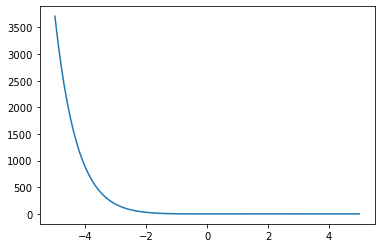

In [177]:
space = np.linspace(-5,5,100)

plt.plot(space,z1(space,space),label='z1')
# plt.plot(space,z2(space,space),label='z2')




print(np.shape(space))

z1_space = space 
z2_space = space


# # Pearson correlation coefficient between z1 and z2
# print(np.corrcoef([z1(x,y),z2(x,y)])[0,1])


# 2.2

5.279305828390056
5.279305828390056
0.06005034708204228
0.26852187992787485
[ 2.20694172  1.57473415 -2.66203886 -1.49504163 -0.14850637]


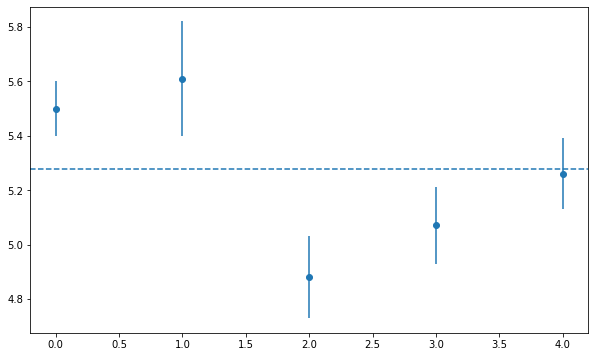

In [178]:
values = [5.5,5.61,4.88,5.07,5.26]
er_values = [0.10,0.21,0.15,0.14,0.13]
we_mean = np.sum(values/np.array(er_values)**2)/np.sum(1/np.array(er_values)**2)
print(we_mean)
we_mean_np = np.average(values,weights=1/np.array(er_values)**2)
print(we_mean_np)
we_er_mean = np.sqrt(1/np.sum(1/np.array(er_values)**2))
print(we_er_mean)

res_val = values-we_mean
std_val = np.std(res_val)
print(std_val)

std_er = np.ones(len(values))*std_val

z_values_stnd = (values-we_mean)/std_val

z_values = (values-we_mean)/er_values

print(z_values)

fig_cav, ax_cav = plt.subplots(1,1,figsize=(10,6))
ax_cav.errorbar(np.arange(len(values)),values,yerr=er_values,fmt='o',label='Values')
ax_cav.axhline(we_mean,ls='--',label='Weighted mean')

In [179]:
def constant(x,a):
    return a

chis = Minuit(Chi2Regression(constant, np.arange(len(values)), values, std_er), a=we_mean)
chis.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5                          │              Nfcn = 13               │
│ EDM = 5.82e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.26    │   0.12    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      a │
├───┼────────┤
│ a │ 0.0144 │
└───┴────────┘

In [180]:
print(chi2_prob(chis,len(values)-1))

values1 = [5.5,5.61,5.07,5.26]
er_values1 = [0.10,0.21,0.14,0.13]

we_mean1 = np.average(values1,weights=1/np.array(er_values1)**2)

std_stnd = np.std(values1-we_mean1)
std_stnd = std_er[1:]
print(std_stnd)

z_values1_stnd = (values1-we_mean1)/std_stnd
print(z_values1_stnd)

z_values1 = (values1-we_mean1)/er_values1
print(z_values1)



(0.2872974951836458, 4)
[0.26852188 0.26852188 0.26852188 0.26852188]
[ 0.53807105  0.94772109 -1.06328822 -0.35571087]
[ 1.44483849  1.21182785 -2.03940108 -0.73473962]


In [181]:

chis = Minuit(Chi2Regression(constant, np.arange(len(values1)), values1, er_values1), a=we_mean1)
chis.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.255                      │              Nfcn = 10               │
│ EDM = 2.23e-24 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.36    │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │       a │
├───┼─────────┤
│ a │ 0.00429 │
└───┴─────────┘

<ErrorView a=0.06553077937393263>
0.041023812559931046 3


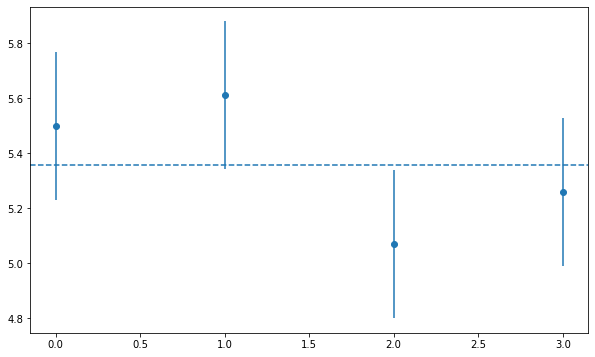

In [190]:
print(chis.errors)
chi2, ndof = chi2_prob(chis, len(values1)-1)
print(chi2, ndof)

fig_cav1, ax_cav1 = plt.subplots(1,1,figsize=(10,6))
ax_cav1.errorbar(np.arange(len(values1)),values1,yerr=std_stnd,fmt='o',label='Values')
ax_cav1.axhline(we_mean1,ls='--',label='Weighted mean')

In [183]:
chi_stand1 = Minuit(Chi2Regression(constant, np.arange(len(values)), values, std_er), a=we_mean_np)
chi_stand1.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5                          │              Nfcn = 13               │
│ EDM = 5.82e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.26    │   0.12    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      a │
├───┼────────┤
│ a │ 0.0144 │
└───┴────────┘

In [184]:
chi2_stand1, ndof_stand1 = chi2_prob(chi_stand1, len(values)-1)
print(chi2_stand1, ndof_stand1)


0.2872974951836458 4


In [185]:
chi_stand = Minuit(Chi2Regression(constant, np.arange(len(values1)), values1, std_er[1:]), a=we_mean_np)
chi_stand.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.444                      │              Nfcn = 13               │
│ EDM = 2.84e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   5.36    │   0.13    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     a │
├───┼───────┤
│ a │ 0.018 │
└───┴───────┘

In [186]:
chi2_stand, ndof_stand = chi2_prob(chi_stand, len(values1)-1)
print(chi2_stand, ndof_stand)

print(z_values_stnd)

0.4855531130782359 3
[ 0.82188525  1.23153529 -1.48705137 -0.77947402 -0.07189667]


In [188]:
def gaus(x,mean,sigma):
    return stats.norm.pdf(x,mean,sigma)

test = np.linspace(5,6,100)

print(stats.ttest_1samp(values,5.514))
stats.ttest_1samp(values1,5.514)


Ttest_1sampResult(statistic=-1.8620456557741227, pvalue=0.13607782449951283)


Ttest_1sampResult(statistic=-1.2708912564409618, pvalue=0.2933652913182042)

# 2.3

In [199]:
a=1.04
aer = 0.10
e = 0.71
eer = 0.12

area = a**2 *np.pi*np.sqrt(1-e**2)

area_er = np.sqrt((2*area/a*aer)**2+(np.pi*a**2*e*eer/(np.sqrt(1-e**2)))**2)

print('The area is: ',area.round(2),'+-',area_er.round(2))

The area is:  2.39 +- 0.62


In [204]:
print(4*a*np.sqrt(2-e**2),np.pi*a*np.sqrt(4-2*e**2))
c1 = 4*a*np.sqrt(2-e**2)

c1_er = np.sqrt((aer*4*np.sqrt(2-e**2))**2+(-4*e*a*eer/np.sqrt(2-e**2))**2)
print(c1_er)

c2 = np.pi*a*np.sqrt(4-2*e**2)

c2_er = np.sqrt((aer*np.pi*np.sqrt(4-2*e**2))**2+(2*np.pi*e*a*eer/np.sqrt(4-2*e**2))**2)
print(c2_er)

c_mu_we = np.average([c1,c2],weights=[1/c1_er**2,1/c2_er**2])
print(c_mu_we)

c_mu_we_er = np.sqrt(1/np.sum([1/c1_er**2,1/c2_er**2]))
print(c_mu_we_er)


5.087970817526375 5.6513146837589
0.5686137239808806
0.6315710531693361
5.340172871287871
0.4225807807461709
